Import requied libraries

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path)
!mv {path} /content/sample_data

100%|██████████| 24.5M/24.5M [00:00<00:00, 194MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2
mv: cannot move '/root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2' to '/content/sample_data/2': Directory not empty


In [34]:
df_train = pd.read_csv('/content/sample_data/2/train.csv')
df_test = pd.read_csv('/content/sample_data/2/test.csv')
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,...,-0.436471,-0.796840,-0.993726,-0.993755,-0.991976,-0.993365,-0.988175,-0.993726,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,...,-0.122040,-0.449522,-0.990335,-0.991960,-0.989732,-0.994489,-0.989549,-0.990335,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.

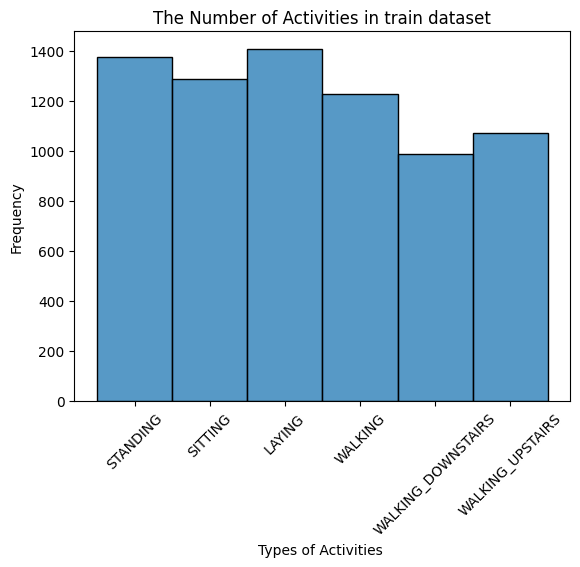

In [6]:
sns.histplot(df_train['Activity'])
plt.xlabel("Types of Activities ")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("The Number of Activities in train dataset")
plt.show()

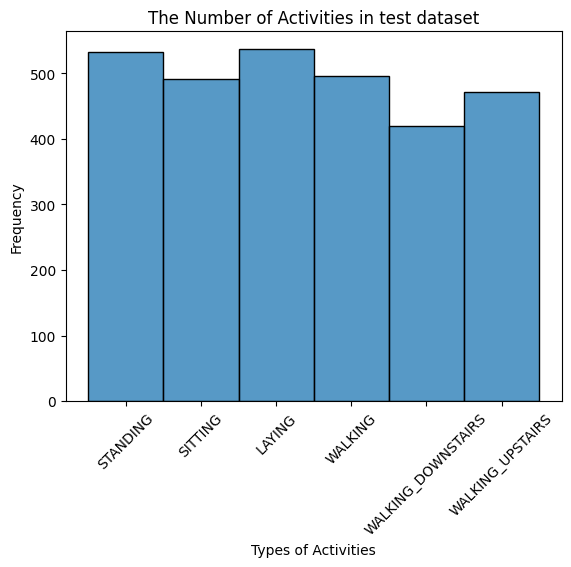

In [7]:
sns.histplot(df_test['Activity'])
plt.xlabel("Types of Activities")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("The Number of Activities in test dataset")
plt.show()

Prepairing data

In [35]:
x_train, y_train = df_train.iloc[:, :-2], df_train.iloc[:, -1:]
x_test, y_test = df_test.iloc[:, :-2], df_test.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [36]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [37]:
scaling = MinMaxScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

# Human Activity Recognition with smartphone using Random Forest

Model with Random Forest

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
print("Accuracy score of Random Forest: ", accuracy_score(y_test, model.predict(x_test)))

Accuracy score of Random Forest:  0.9267051238547676


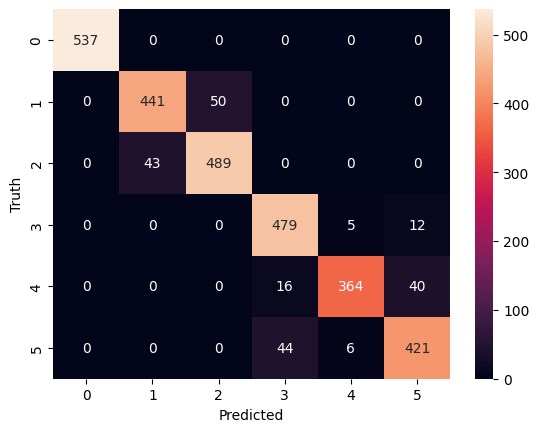

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.90      0.90       491
           2       0.91      0.92      0.91       532
           3       0.89      0.97      0.93       496
           4       0.97      0.87      0.92       420
           5       0.89      0.89      0.89       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print('-'*100)
print(classification_report(y_test, model.predict(x_test)))

# Human Activity Recognition with Smartphones using Neutral Network

Import libraries

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import keras

**Model with Sigmoid**

In [46]:
def model_sigmoid():
  model = Sequential()
  model.add(Dense(512, activation='sigmoid', input_shape=(x_train.shape[1],)))
  model.add(Dense(256, activation='sigmoid'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='sigmoid'))
  model.add(Dense(64, activation='sigmoid'))
  model.add(Dropout(0.3))
  model.add(Dense(6, activation='softmax'))
  return model

In [47]:
model = model_sigmoid()
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 512)                 │         287,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460,614 (1.76 MB)

 Trainable params: 460,614 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

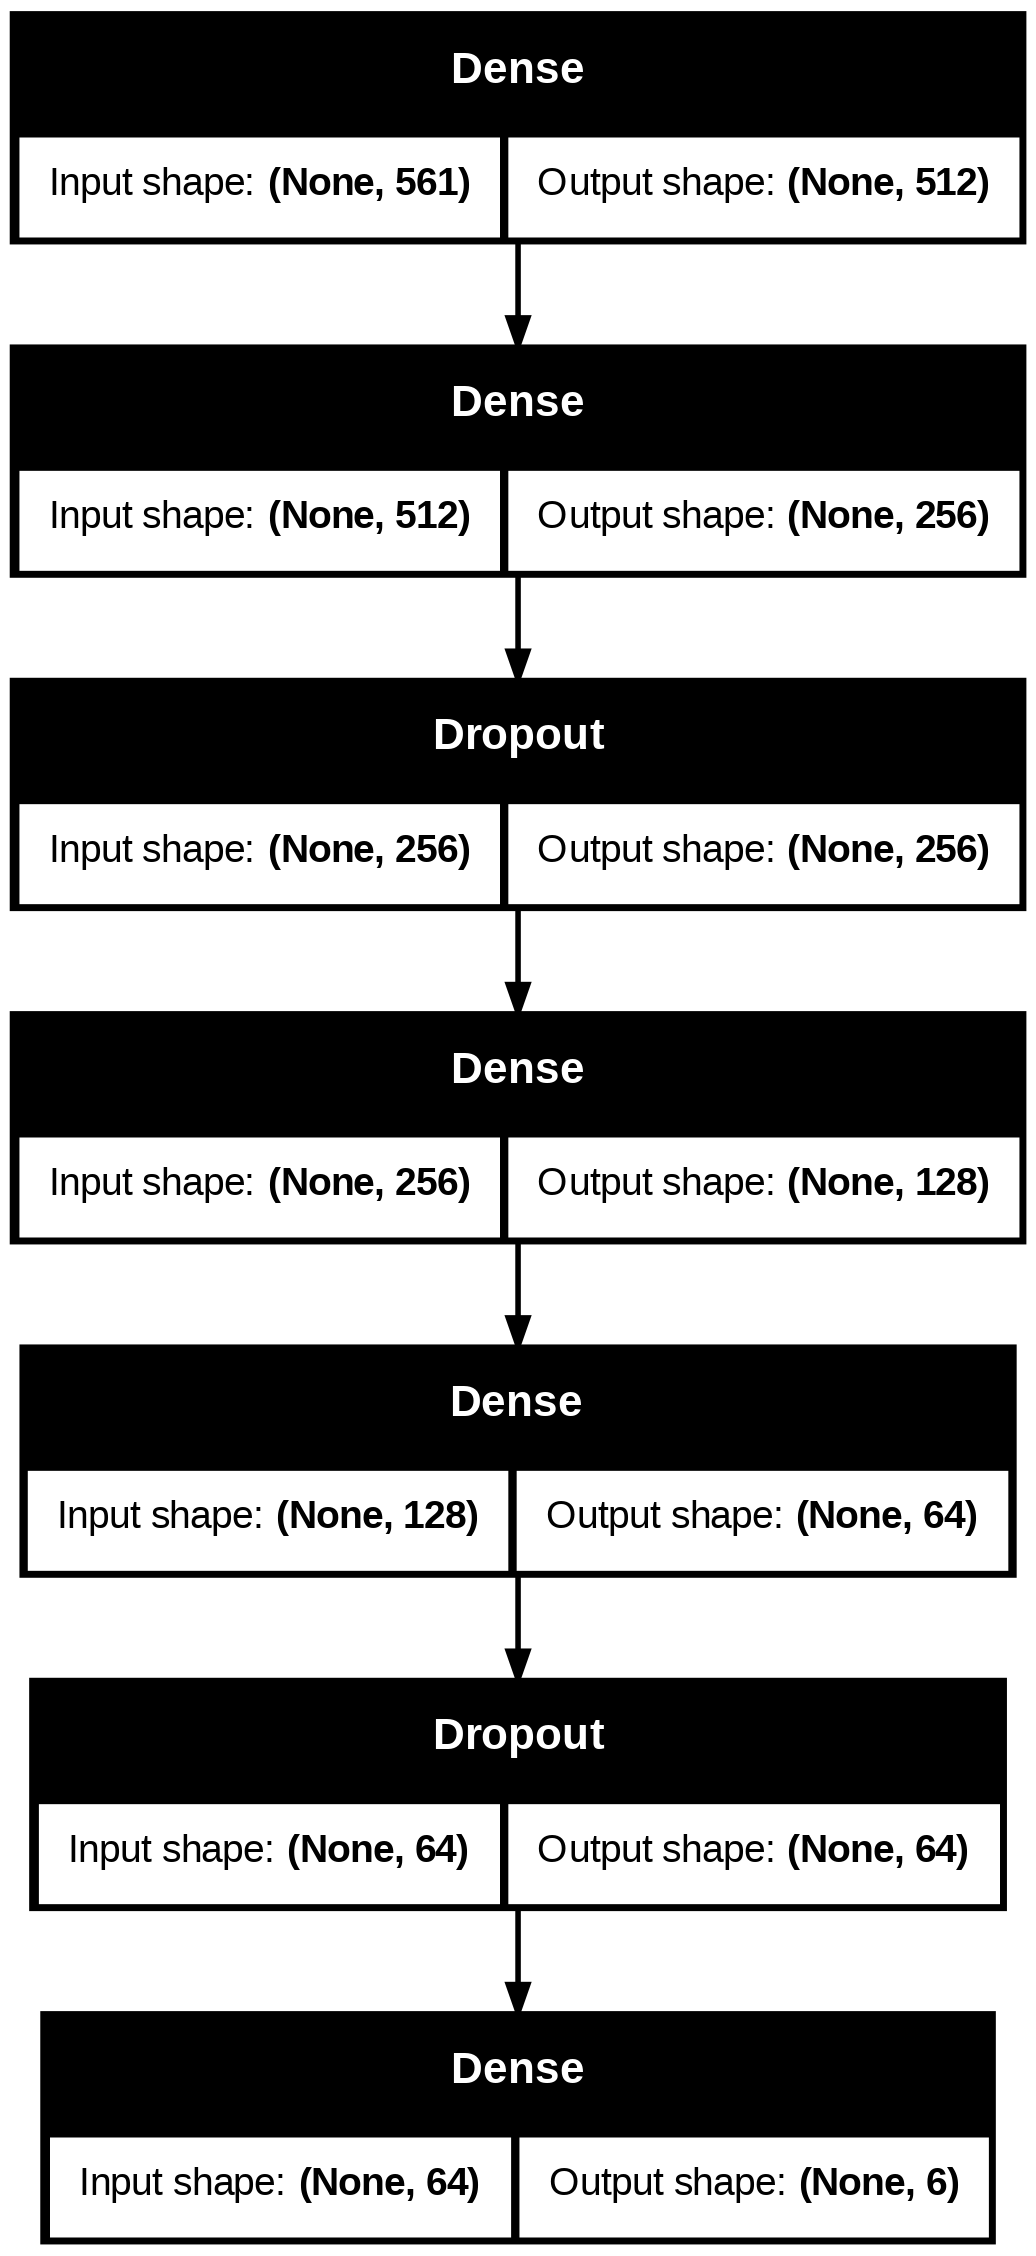

In [49]:
keras.utils.plot_model(model, show_shapes=True)

In [50]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, batch_size = 16, epochs= 100, validation_data = (x_test,y_test), callbacks=[callback])

Epoch 1/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3356 - loss: 1.4240 - val_accuracy: 0.7163 - val_loss: 0.6679
Epoch 2/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7902 - loss: 0.5526 - val_accuracy: 0.8646 - val_loss: 0.3724
Epoch 3/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9159 - loss: 0.2581 - val_accuracy: 0.9063 - val_loss: 0.2539
Epoch 4/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9433 - loss: 0.1770 - val_accuracy: 0.9026 - val_loss: 0.2654
Epoch 5/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9502 - loss: 0.1611 - val_accuracy: 0.9023 - val_loss: 0.2904
Epoch 6/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9490 - loss: 0.1429 - val_accuracy: 0.9304 - val_loss: 0.1901
Epoch 7/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9654 - loss: 0.0974 - val_accuracy: 0.9301 - val_loss: 0.2214
Epoch 8/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9610 - loss: 0.1164 - val_accu

In [51]:
# Evaluation model
model.evaluate(x_test, y_test)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9441 - loss: 0.1605


[0.19085358083248138, 0.9416355490684509]

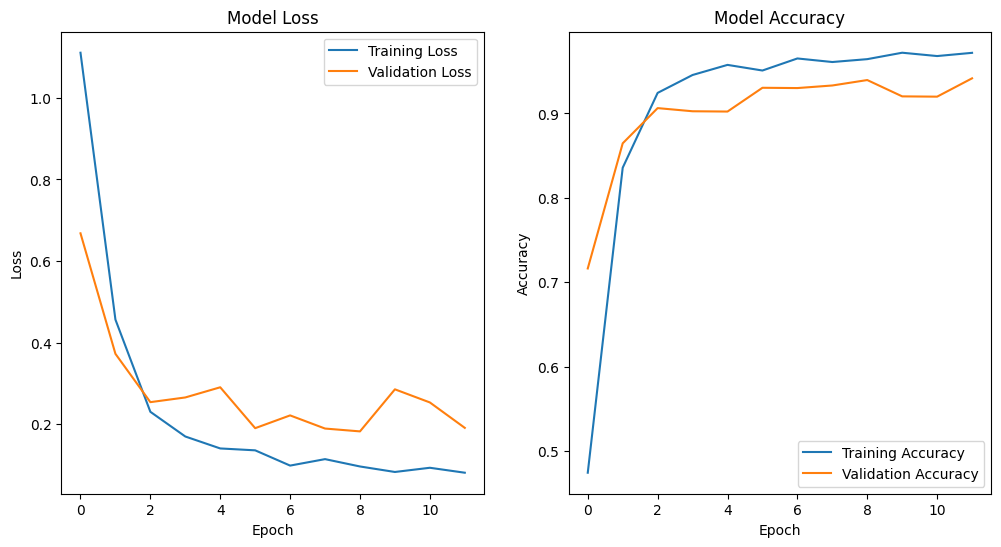

In [52]:

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model with ReLu

In [57]:
def model_relu():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(6, activation='softmax'))
  return model

In [58]:
model2 = model_relu()
model2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 64)                  │          35,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 234,246 (915.02 KB)

 Trainable params: 234,246 (915.02 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history2 = model2.fit(x_train, y_train, batch_size = 16, epochs= 100, validation_data = (x_test,y_test), callbacks=[callback])

Epoch 1/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6959 - loss: 0.6787 - val_accuracy: 0.8419 - val_loss: 0.3878
Epoch 2/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9153 - loss: 0.2212 - val_accuracy: 0.8772 - val_loss: 0.3312
Epoch 3/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9421 - loss: 0.1558 - val_accuracy: 0.9155 - val_loss: 0.2151
Epoch 4/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9529 - loss: 0.1194 - val_accuracy: 0.9053 - val_loss: 0.2765
Epoch 5/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9582 - loss: 0.1139 - val_accuracy: 0.9247 - val_loss: 0.2631
Epoch 6/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9651 - loss: 0.0932 - val_accuracy: 0.9362 - val_loss: 0.1816
Epoch 7/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9598 - loss: 0.1060 - val_accuracy: 0.9260 - val_loss: 0.2607
Epoch 8/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9653 - loss: 0.0953 - val_accu

In [62]:
model2.evaluate(x_test, y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9496 - loss: 0.1505


[0.2002783566713333, 0.9392602443695068]

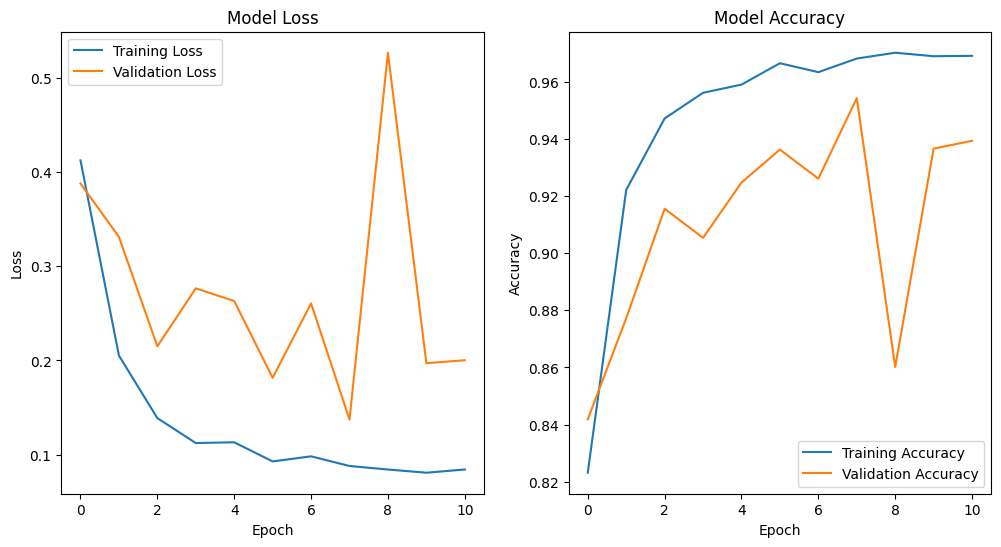

In [64]:
# Plot Training & Validation
# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()